# Notebook #1


### Name: Tulsi Patel


### Date: 10.27.2021


### PID: 730392259


### Goal: Filter and create a spike raster for Pvalb-IRES-Cre/Female/VISp/Drifting Gratings in Brain Observatory 1.1.

## Protocol

### Starting code. 

In [10]:
import os

import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
from scipy.ndimage.filters import gaussian_filter

from allensdk.brain_observatory.ecephys.ecephys_project_cache import EcephysProjectCache
from allensdk.brain_observatory.ecephys.ecephys_session import (
    EcephysSession
)
from allensdk.brain_observatory.ecephys.visualization import plot_mean_waveforms, plot_spike_counts, raster_plot
from allensdk.brain_observatory.visualization import plot_running_speed

# tell pandas to show all columns when we display a DataFrame
pd.set_option("display.max_columns", None)

In [11]:
data_directory = '/Users/tulsipatel/local1/ecephys_cache_dir' 
# must be updated to a valid directory in your filesystem

manifest_path = os.path.join(data_directory, "manifest.json")

In [12]:
cache = EcephysProjectCache.from_warehouse(manifest=manifest_path)

In [13]:
cache.get_session_table().head()

,published_at,specimen_id,session_type,age_in_days,sex,full_genotype,unit_count,channel_count,probe_count,ecephys_structure_acronyms
id,,,,,,,,,,
715093703,2019-10-03T00:00:00Z,699733581,brain_observatory_1.1,118.0,M,Sst-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,884,2219,6,"[CA1, VISrl, nan, PO, LP, LGd, CA3, DG, VISl, ..."
719161530,2019-10-03T00:00:00Z,703279284,brain_observatory_1.1,122.0,M,Sst-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,755,2214,6,"[TH, Eth, APN, POL, LP, DG, CA1, VISpm, nan, N..."
721123822,2019-10-03T00:00:00Z,707296982,brain_observatory_1.1,125.0,M,Pvalb-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,444,2229,6,"[MB, SCig, PPT, NOT, DG, CA1, VISam, nan, LP, ..."
732592105,2019-10-03T00:00:00Z,717038288,brain_observatory_1.1,100.0,M,wt/wt,824,1847,5,"[grey, VISpm, nan, VISp, VISl, VISal, VISrl]"
737581020,2019-10-03T00:00:00Z,718643567,brain_observatory_1.1,108.0,M,wt/wt,568,2218,6,"[grey, VISmma, nan, VISpm, VISp, VISl, VISrl]"


In [14]:
sessions = cache.get_session_table()


print('Total number of sessions: ' + str(len(sessions)))

sessions.head()

Total number of sessions: 58


,published_at,specimen_id,session_type,age_in_days,sex,full_genotype,unit_count,channel_count,probe_count,ecephys_structure_acronyms
id,,,,,,,,,,
715093703,2019-10-03T00:00:00Z,699733581,brain_observatory_1.1,118.0,M,Sst-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,884,2219,6,"[CA1, VISrl, nan, PO, LP, LGd, CA3, DG, VISl, ..."
719161530,2019-10-03T00:00:00Z,703279284,brain_observatory_1.1,122.0,M,Sst-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,755,2214,6,"[TH, Eth, APN, POL, LP, DG, CA1, VISpm, nan, N..."
721123822,2019-10-03T00:00:00Z,707296982,brain_observatory_1.1,125.0,M,Pvalb-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,444,2229,6,"[MB, SCig, PPT, NOT, DG, CA1, VISam, nan, LP, ..."
732592105,2019-10-03T00:00:00Z,717038288,brain_observatory_1.1,100.0,M,wt/wt,824,1847,5,"[grey, VISpm, nan, VISp, VISl, VISal, VISrl]"
737581020,2019-10-03T00:00:00Z,718643567,brain_observatory_1.1,108.0,M,wt/wt,568,2218,6,"[grey, VISmma, nan, VISpm, VISp, VISl, VISrl]"


### Filtering: Brain Observatory 1.1 -- Sst-IRES mice -- Female -- VISp

In [15]:
filtered_sessions = sessions[(sessions.sex == 'F') & \
                             (sessions.full_genotype.str.find('Pvalb-IRES-Cre') > -1) & \
                             (sessions.session_type == 'brain_observatory_1.1') & \
                             (['VISp' in acronyms for acronyms in 
                               sessions.ecephys_structure_acronyms])]

filtered_sessions.head()

,published_at,specimen_id,session_type,age_in_days,sex,full_genotype,unit_count,channel_count,probe_count,ecephys_structure_acronyms
id,,,,,,,,,,
746083955,2019-10-03T00:00:00Z,726170935,brain_observatory_1.1,98.0,F,Pvalb-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,582,2216,6,"[VPM, TH, LGd, CA3, CA2, CA1, VISal, nan, grey..."
773418906,2019-10-03T00:00:00Z,757329624,brain_observatory_1.1,124.0,F,Pvalb-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,546,2232,6,"[PPT, NOT, SUB, ProS, CA1, VISam, nan, APN, DG..."


### Stimulus-specific metrics that are computed for each unit. 

#### Applies filters and returns values above a specific threshold. 

Link about quality metrics: https://allensdk.readthedocs.io/en/latest/_static/examples/nb/ecephys_quality_metrics.ipynb

In [16]:
analysis_metrics1 = cache.get_unit_analysis_metrics_by_session_type('brain_observatory_1.1')
print(str(len(analysis_metrics1)) + ' units in table 1')

21842 units in table 1


In [17]:
session = cache.get_session_data(filtered_sessions.index.values[0],
                                 isi_violations_maximum = np.inf,
                                 amplitude_cutoff_maximum = np.inf,
                                 presence_ratio_minimum = -np.inf
                                )

print([attr_or_method for attr_or_method in dir(session) if attr_or_method[0] != '_'])

['DETAILED_STIMULUS_PARAMETERS', 'LazyProperty', 'age_in_days', 'api', 'channel_structure_intervals', 'channels', 'conditionwise_spike_statistics', 'ecephys_session_id', 'from_nwb_path', 'full_genotype', 'get_current_source_density', 'get_inter_presentation_intervals_for_stimulus', 'get_invalid_times', 'get_lfp', 'get_parameter_values_for_stimulus', 'get_pupil_data', 'get_screen_gaze_data', 'get_stimulus_epochs', 'get_stimulus_parameter_values', 'get_stimulus_table', 'inter_presentation_intervals', 'invalid_times', 'mean_waveforms', 'metadata', 'num_channels', 'num_probes', 'num_stimulus_presentations', 'num_units', 'optogenetic_stimulation_epochs', 'presentationwise_spike_counts', 'presentationwise_spike_times', 'probes', 'rig_equipment_name', 'rig_geometry_data', 'running_speed', 'session_start_time', 'session_type', 'sex', 'specimen_name', 'spike_amplitudes', 'spike_times', 'stimulus_conditions', 'stimulus_names', 'stimulus_presentations', 'structure_acronyms', 'structurewise_unit_c

## Finding the Drifting Set in the session. From this point onward, my code branches to try to find the firing rates/spikes of the units during the Static Set. 

In [18]:
session.get_stimulus_table(['drifting_gratings']).head()

,contrast,orientation,phase,size,spatial_frequency,start_time,stimulus_block,stimulus_name,stop_time,temporal_frequency,duration,stimulus_condition_id
stimulus_presentation_id,,,,,,,,,,,,
3798,0.8,135,"[42471.86666667, 42471.86666667]","[250.0, 250.0]",0.04,1596.090494,2,drifting_gratings,1598.092154,2,2.00166,246
3799,0.8,0,"[42471.86666667, 42471.86666667]","[250.0, 250.0]",0.04,1599.092987,2,drifting_gratings,1601.094657,1,2.00167,247
3800,0.8,45,"[42471.86666667, 42471.86666667]","[250.0, 250.0]",0.04,1602.095494,2,drifting_gratings,1604.097214,1,2.00172,248
3801,0.8,90,"[42471.86666667, 42471.86666667]","[250.0, 250.0]",0.04,1605.098017,2,drifting_gratings,1607.099687,1,2.00167,249
3802,0.8,315,"[42471.86666667, 42471.86666667]","[250.0, 250.0]",0.04,1608.100534,2,drifting_gratings,1610.102204,1,2.00167,250


In [19]:
# how many units have firing rates that are greater than 0?
print(f'{session.units.shape[0]} units total')
units_with_firing_rate = session.units[session.units['firing_rate'] > 0]
print(f'{units_with_firing_rate.shape[0]} units have firing rate > 0')

1542 units total
1542 units have firing rate > 0


In [20]:
 # grab an arbitrary unit (we made units_with_firing_rates above)
firing_rate_unit_ids = units_with_firing_rate.index.values
unit_id = firing_rate_unit_ids[0]

print(f"{len(session.spike_times[unit_id])} spikes were detected for unit {unit_id} at times:")
session.spike_times[unit_id]

277946 spikes were detected for unit 951878213 at times:


array([7.99361367e+00, 1.07580829e+01, 1.54212873e+01, ...,
       9.68230387e+03, 9.68232147e+03, 9.68233227e+03])

## Raster Plot for Pvalb-IRES-Cre Female VISp Drifting Gratings

In [22]:
# get spike times from the first block of drifting gratings presentations 
drifting_presentation_ids = session.stimulus_presentations.loc[
    (session.stimulus_presentations['stimulus_name'] == 'drifting_gratings')
].index.values

times = session.presentationwise_spike_times(
    stimulus_presentation_ids=drifting_presentation_ids,
    unit_ids=firing_rate_unit_ids
)

times.head()

,stimulus_presentation_id,unit_id,time_since_stimulus_presentation_onset
spike_time,,,
1596.090654,3798,951868625,0.000160
1596.090693,3798,951885011,0.000199
1596.090779,3798,951886207,0.000285
1596.090788,3798,951865859,0.000293
1596.090967,3798,951881274,0.000473


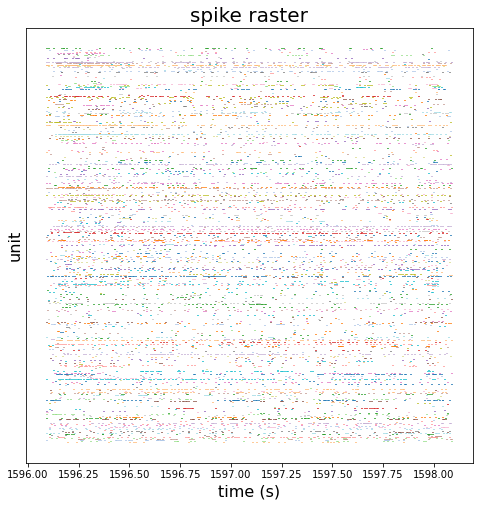

color                                                null
contrast                                              0.8
frame                                                null
orientation                                           135
phase                    [42471.86666667, 42471.86666667]
size                                       [250.0, 250.0]
spatial_frequency                                    0.04
start_time                                        1596.09
stimulus_block                                          2
stimulus_name                           drifting_gratings
stop_time                                         1598.09
temporal_frequency                                      2
x_position                                           null
y_position                                           null
duration                                          2.00166
stimulus_condition_id                                 246
Name: 3798, dtype: object

In [27]:
first_drifting_presentation_id = times['stimulus_presentation_id'].values[0]
plot_times = times[times['stimulus_presentation_id'] == first_drifting_presentation_id]

fig = raster_plot(plot_times)
plt.show()

# also print out this presentation
session.stimulus_presentations.loc[first_drifting_presentation_id]

## Resources Used
https://allensdk.readthedocs.io/en/latest/visual_coding_neuropixels.html
https://allensdk.readthedocs.io/en/latest/_static/examples/nb/ecephys_data_access.html
https://allensdk.readthedocs.io/en/latest/_static/examples/nb/ecephys_session.html#Stimulus-presentations